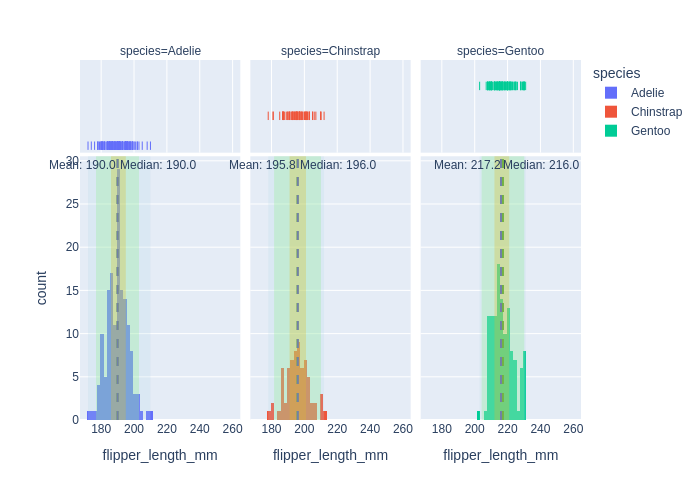

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset from the URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Filter the dataset to drop NA values in the flipper_length_mm column
penguins = penguins.dropna(subset=["flipper_length_mm"])

# Function to calculate mean, median, min, max, IQR, and 2 SD range
def calculate_stats(df, column):
    mean = df[column].mean()
    median = df[column].median()
    min_val = df[column].min()
    max_val = df[column].max()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    std = df[column].std()
    return mean, median, min_val, max_val, q1, q3, iqr, std

# Create histograms for each species
species_list = penguins["species"].unique()
fig = px.histogram(penguins, x="flipper_length_mm", color="species", nbins=30, facet_col="species", marginal="rug")

# Add vline and vrect to the plot for each species
for species in species_list:
    species_data = penguins[penguins["species"] == species]
    mean, median, min_val, max_val, q1, q3, iqr, std = calculate_stats(species_data, "flipper_length_mm")

    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line_dash="dash", line_color="green", annotation_text=f"Mean: {mean:.1f}", annotation_position="top left", row=1, col=species_list.tolist().index(species)+1)
    fig.add_vline(x=median, line_dash="dash", line_color="blue", annotation_text=f"Median: {median:.1f}", annotation_position="top right", row=1, col=species_list.tolist().index(species)+1)

    # Add vertical rectangles for range, IQR, and ±2SD
    # Range (min to max)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="lightblue", opacity=0.2, line_width=0, row=1, col=species_list.tolist().index(species)+1)
    
    # IQR (q1 to q3)
    fig.add_vrect(x0=q1, x1=q3, fillcolor="orange", opacity=0.3, line_width=0, row=1, col=species_list.tolist().index(species)+1)

    # ±2 Standard Deviations (mean - 2*std to mean + 2*std)
    fig.add_vrect(x0=mean - 2*std, x1=mean + 2*std, fillcolor="lightgreen", opacity=0.3, line_width=0, row=1, col=species_list.tolist().index(species)+1)

# Show the plot
fig.show(renderer="png")


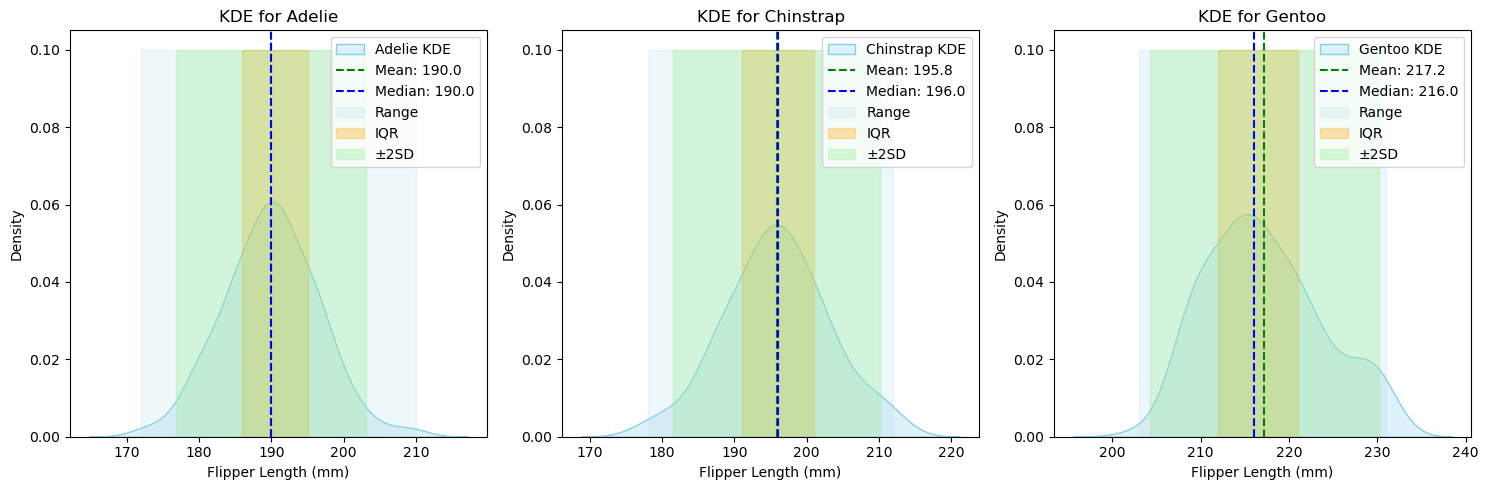

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset from the URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Filter the dataset to drop NA values in the flipper_length_mm column
penguins = penguins.dropna(subset=["flipper_length_mm"])

# Function to calculate mean, median, min, max, IQR, and 2 SD range
def calculate_stats(df, column):
    mean = df[column].mean()
    median = df[column].median()
    min_val = df[column].min()
    max_val = df[column].max()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    std = df[column].std()
    return mean, median, min_val, max_val, q1, q3, iqr, std

# Get the unique species
species_list = penguins["species"].unique()

# Create a grid of plots (3 per row)
n_cols = 3
n_rows = (len(species_list) + n_cols - 1) // n_cols  # Number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Loop through each species to plot KDE and statistics
for i, species in enumerate(species_list):
    species_data = penguins[penguins["species"] == species]
    mean, median, min_val, max_val, q1, q3, iqr, std = calculate_stats(species_data, "flipper_length_mm")
    
    # Plot the KDE for flipper_length_mm
    sns.kdeplot(species_data["flipper_length_mm"], ax=axes[i], fill=True, color="skyblue", label=f"{species} KDE")
    
    # Add vertical lines for the mean and median
    axes[i].axvline(mean, color="green", linestyle="--", label=f"Mean: {mean:.1f}")
    axes[i].axvline(median, color="blue", linestyle="--", label=f"Median: {median:.1f}")

    # Add filled rectangles for range, IQR, and ±2 SD
    # Range (min to max)
    axes[i].fill_betweenx(y=[0, 0.1], x1=min_val, x2=max_val, color='lightblue', alpha=0.2, label="Range")
    
    # IQR (q1 to q3)
    axes[i].fill_betweenx(y=[0, 0.1], x1=q1, x2=q3, color='orange', alpha=0.3, label="IQR")
    
    # ±2 Standard Deviations (mean - 2*std to mean + 2*std)
    axes[i].fill_betweenx(y=[0, 0.1], x1=mean - 2*std, x2=mean + 2*std, color='lightgreen', alpha=0.3, label="±2SD")

    # Set titles and labels
    axes[i].set_title(f"KDE for {species}")
    axes[i].set_xlabel("Flipper Length (mm)")
    axes[i].set_ylabel("Density")

    # Add a legend to each subplot
    axes[i].legend(loc="upper right")

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [3]:
# Question 3 statements about box plots, histograms, and KDEs
# ChatGPT agreed with all of these statements.

# A box plot shows the lowest value, highest value, quartiles and medians 
# in an easily digestible format. It gives a good general overview if I 
# am working with numerical data. However, by using a box plot, I can 
# easily overlook the finer details of the dataset. It also would not 
# be ideal for every dataset.

# A histogram is similar to a box plot in some ways, and has some of the 
# same advantages, but is also different in showing the details of the 
# dataset. A histogram is a bar graph that groups relatively similar data 
# points and easily visualizes them into bars of different heights. It 
# shows a finer attention to detail than a box plot, but it still has to 
# sacrifice some of that detail in the process of grouping together data 
# points into bars. It also does not come with quartiles, medians, etc. 
# on its own.

# Kernel Density Estimators give a great visualization of data provided 
# also by box plots and histograms. It easily visualizes data by smoothing 
# a distribution of data using data-backed kernel smoothing. It is almost 
# like a summary of a histogram. Again, the finer details of the dataset 
# are lost through the data smoothing, but it gives a very quickly 
# understandable summary of data. It shares a lot of similarity to histograms, 
# but has advantages above them by displaying them in a simplified display.


In [4]:
# Question 3 Pros and Cons

# Box Plot:
# Pros:
# - Provides a simple and compact summary of key statistics (min, max, quartiles, median).
# - Good for comparing distributions between multiple groups or categories.
# - Clearly shows outliers and variability.
# - Does not rely on assumptions about the data’s distribution.
# Cons:
# - Does not show the actual distribution or frequency of data points.
# - Finer details of the data (e.g., shape, modality) can be overlooked.
# - Less effective for small datasets as individual data points are not visible.
# - Limited in handling more complex distributions (e.g., bimodal or skewed).

# Histogram:
# Pros:
# - Visualizes the distribution of data, showing the frequency of values.
# - Good for understanding the shape of the distribution (e.g., skewness, modality).
# - Provides a clearer view of data clustering and spread than box plots.
# - Effective for large datasets with continuous data.
# Cons:
# - Binning introduces some arbitrariness and can affect the shape of the distribution.
# - Choosing bin sizes is subjective; too many bins can make the data noisy, while too few can oversimplify it.
# - Does not explicitly show summary statistics like median or quartiles.
# - Less suitable for small datasets where the binning can be misleading.

# Kernel Density Estimator (KDE):
# Pros:
# - Provides a smooth and continuous estimate of the data distribution.
# - More visually appealing and easier to interpret than histograms for general trends.
# - Does not rely on arbitrary bin sizes, as it shows a continuous curve.
# - Good for detecting subtle features like bimodal distributions or peaks.
# Cons:
# - Smoothing can obscure finer details and outliers in the data.
# - Sensitive to the choice of bandwidth; oversmoothing or undersmoothing can distort the distribution.
# - Does not inherently show summary statistics like median, quartiles, or outliers.
# - Can be less intuitive for users unfamiliar with density estimation.

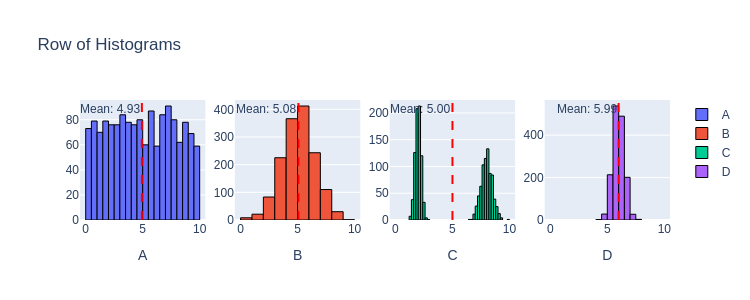

In [5]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

# Calculate means for each dataset
mean1 = np.mean(data1)
mean2 = np.mean(data2)
mean3 = np.mean(data3)
mean4 = np.mean(data4)

# Add vertical lines at the mean for each histogram
fig.add_vline(x=mean1, line=dict(color='red', width=2, dash='dash'), row=1, col=1, annotation_text=f'Mean: {mean1:.2f}', annotation_position="top left")
fig.add_vline(x=mean2, line=dict(color='red', width=2, dash='dash'), row=1, col=2, annotation_text=f'Mean: {mean2:.2f}', annotation_position="top left")
fig.add_vline(x=mean3, line=dict(color='red', width=2, dash='dash'), row=1, col=3, annotation_text=f'Mean: {mean3:.2f}', annotation_position="top left")
fig.add_vline(x=mean4, line=dict(color='red', width=2, dash='dash'), row=1, col=4, annotation_text=f'Mean: {mean4:.2f}', annotation_position="top left")

# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [6]:
# Question 4 Answers:

# Datasets A, B, and C have means of ~5 while D has a similar mean of 6
# Dataset A has a Uniform Distribution
# Dataset C has a Bimodal Distribution
# Dataset B and D have similar variances, both have Normal Distributions

# Which datasets have similar means and similar variances

# None of the datasets have very similar variances AND means.
# The closest being A and D, with similar variances but a difference of mean
# (However, this difference is only off by one)

# Which datasets have similar means but quite different variances

# Datasets A, B, and C have similar means of ~5, but all three have different variances
# Dataset A has a Uniform Distribution
# Dataset B has a Normal Distribution
# Dataset C has a Bimodal Distribution

# Which datasets have similar variances but quite different means

# Datasets A and D have similar variances but a difference of mean
# A has a mean of 5, D has a mean of 6

# Which datasets have quite different means and quite different variances
# The most unique dataset is D, with a different mean than the rest, and a unique distribution from A and C
# So D and B, and D and A are both valid answers to this question

In [7]:
# https://chatgpt.com/share/66f5fa41-c5a8-8000-b6df-3d3422c5073c
# Transcript for all above questions

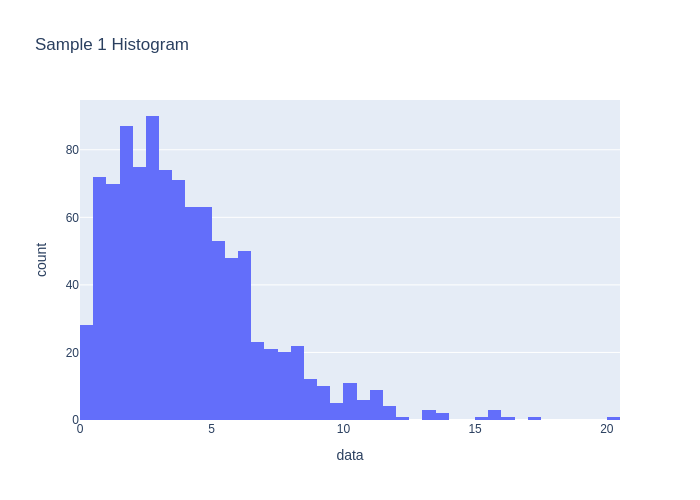

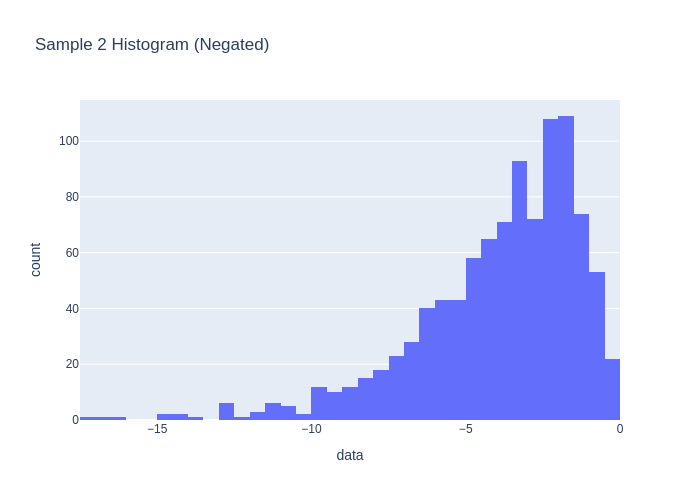

In [8]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Generate first sample
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram for the first sample
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title="Sample 1 Histogram")

# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
fig1.show(renderer="png")

# Calculate mean and median of the first sample
mean_sample1 = sample1.mean()
median_sample1 = np.quantile(sample1, [0.5])

# Generate second sample (negated values)
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram for the second sample
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title="Sample 2 Histogram (Negated)")

# Display the second histogram
fig2.show(renderer="png")


In [9]:
# Question 5:

# In a dataset that is 'symmetrical', the mean and median are equal, as data is evenly spread.
# In a right-skewed (positively skewed) distribution, the mean is greater than the median 
# because a few high values pull the mean to the right.
# In a left-skewed (negatively skewed) distribution, the mean is less than the median 
# due to a few low values pulling the mean to the left.

restaurant id                      int64
category id                        int64
item id                            int64
serving size (oz)                float64
calories                           int64
calories from fat                float64
total fat (g)                     object
total fat (% daily value)        float64
saturated fat (g)                float64
saturated fat (% daily value)    float64
trans fat (g)                    float64
cholesterol (mg)                 float64
cholesterol (% daily value)      float64
sodium (mg)                      float64
sodium (% daily value)           float64
carbohydrates (g)                  int64
carbohydrates (% daily value)    float64
dietary fiber (g)                  int64
dietary fiber (% daily value)    float64
sugars (g)                       float64
protein (g)                      float64
vitamin a (% daily value)        float64
vitamin c (% daily value)        float64
calcium (% daily value)          float64
iron (% daily va

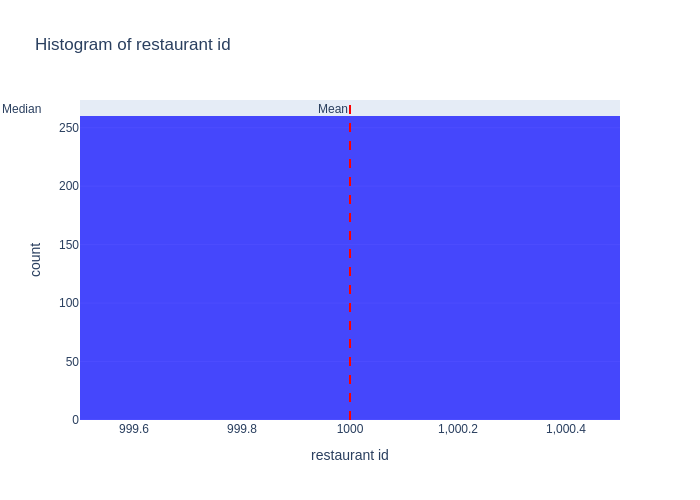

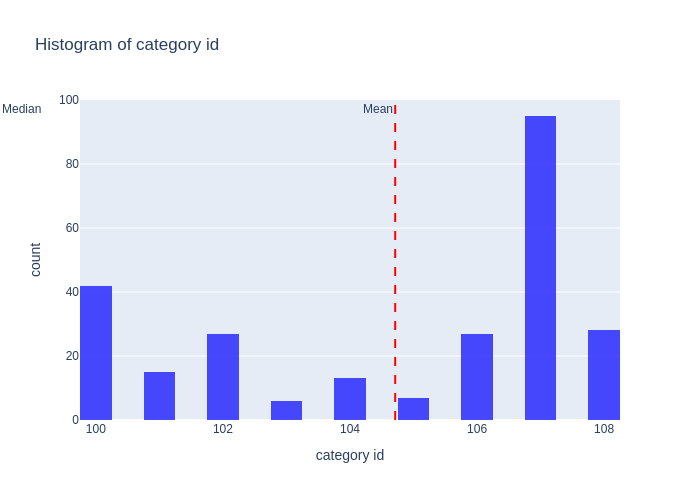

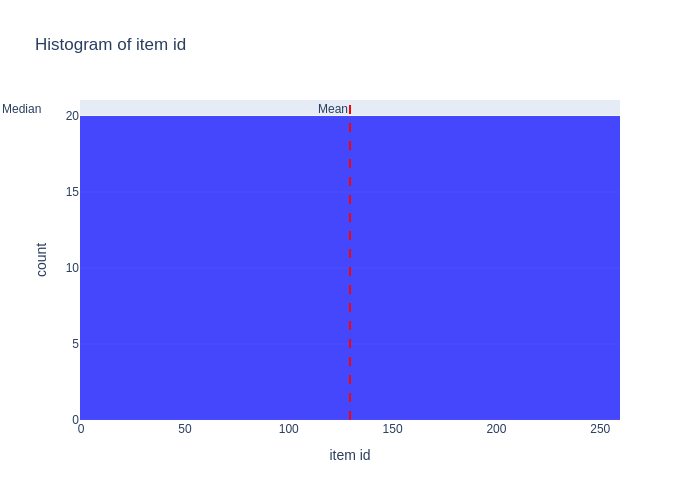

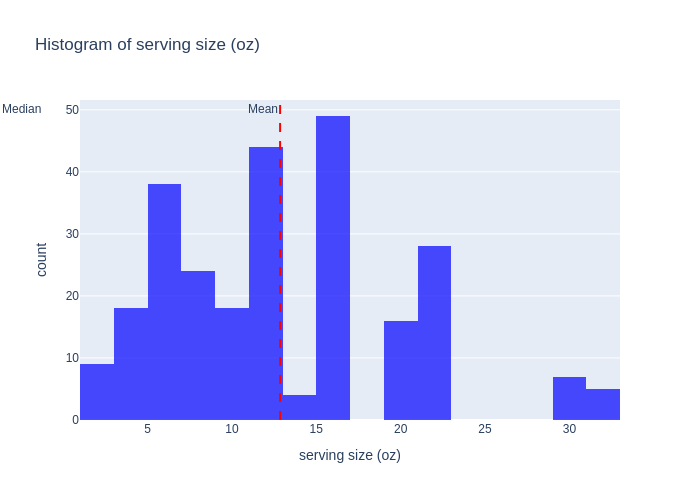

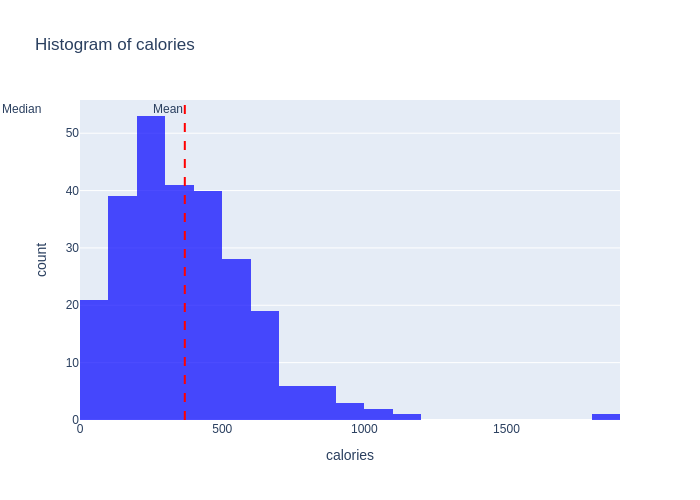

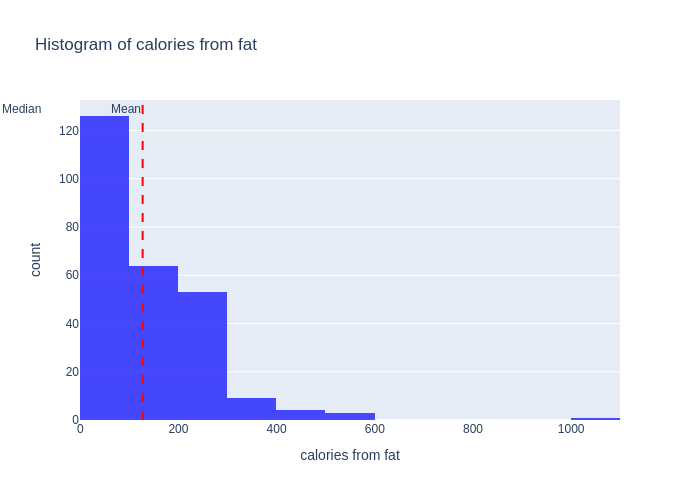

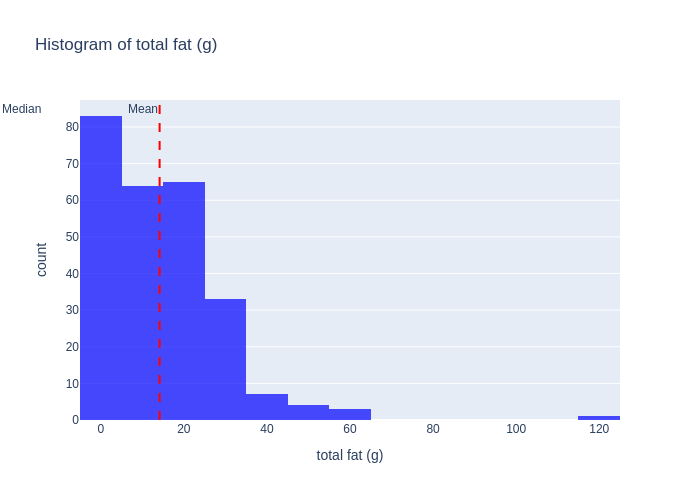

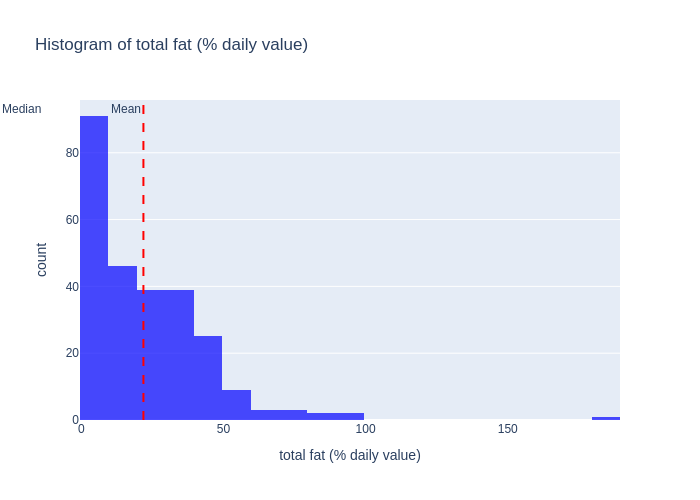

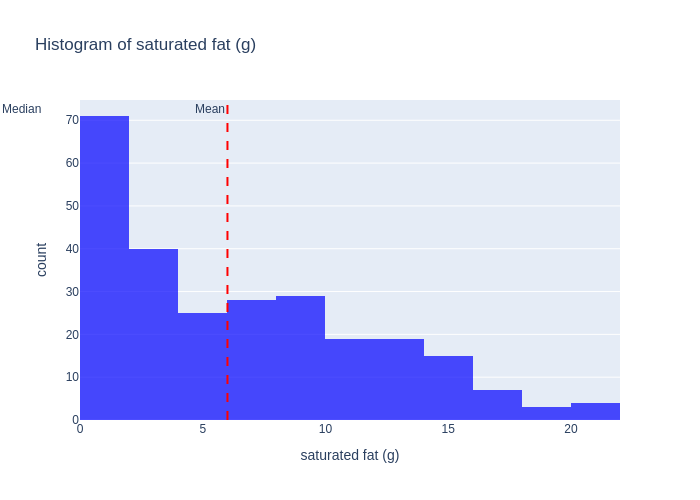

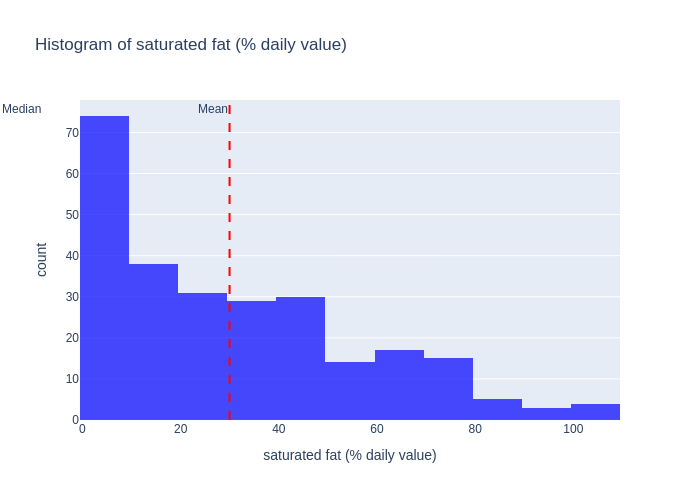

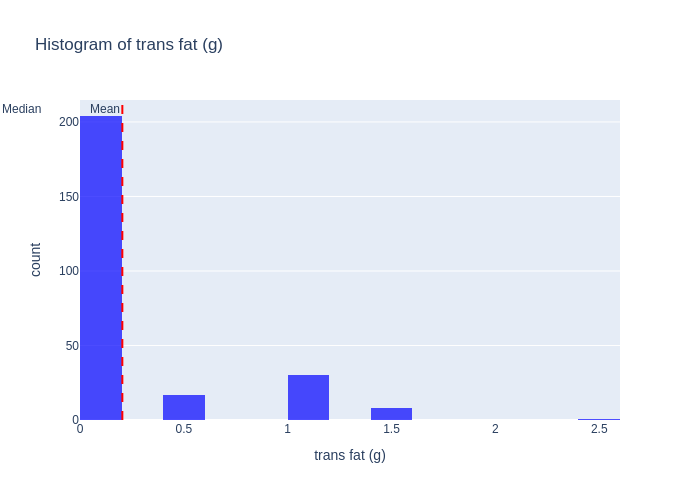

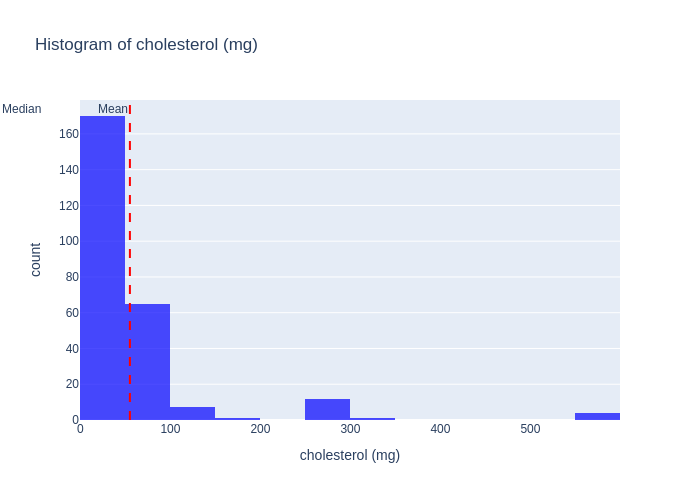

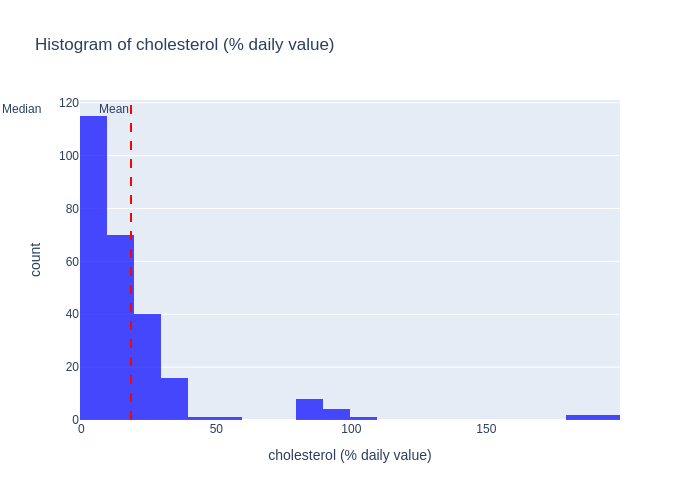

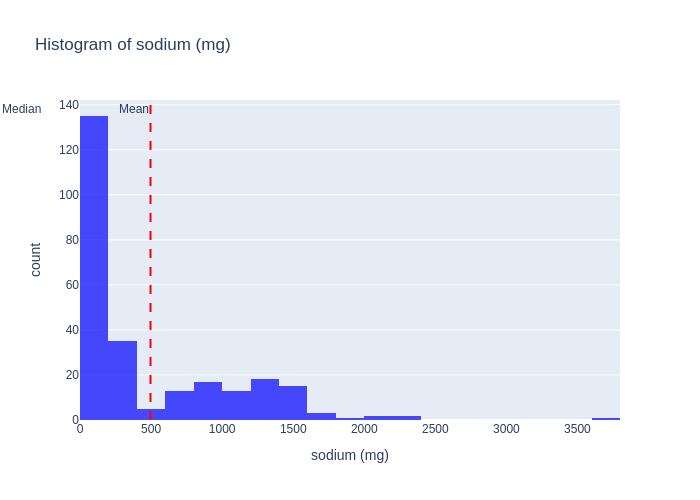

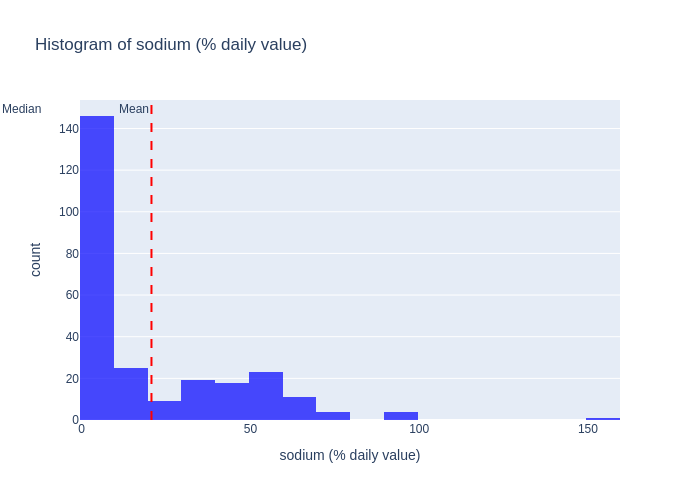

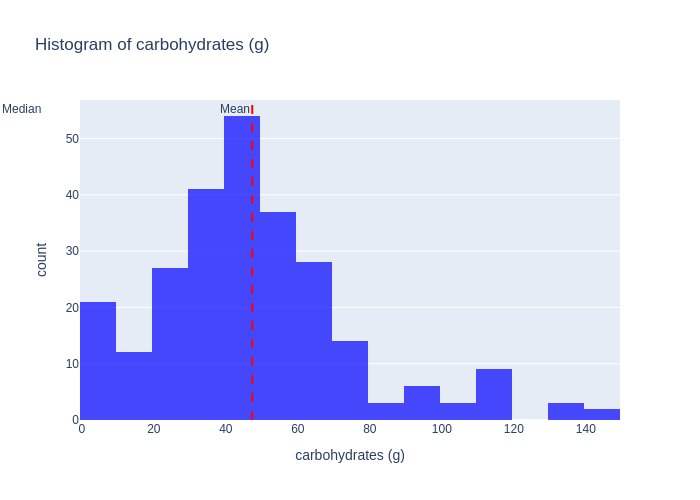

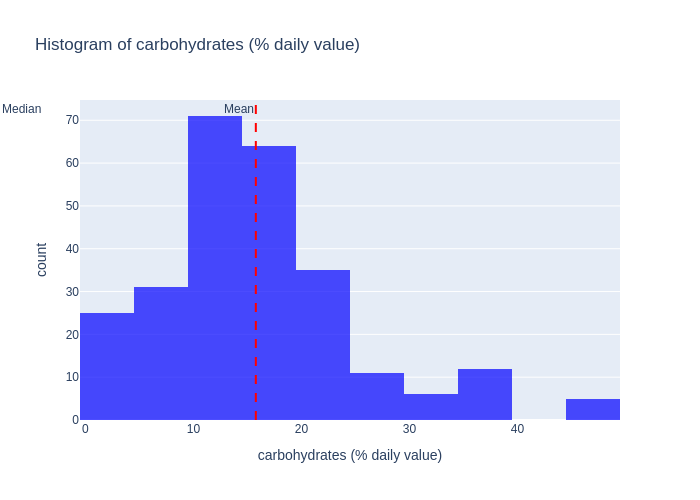

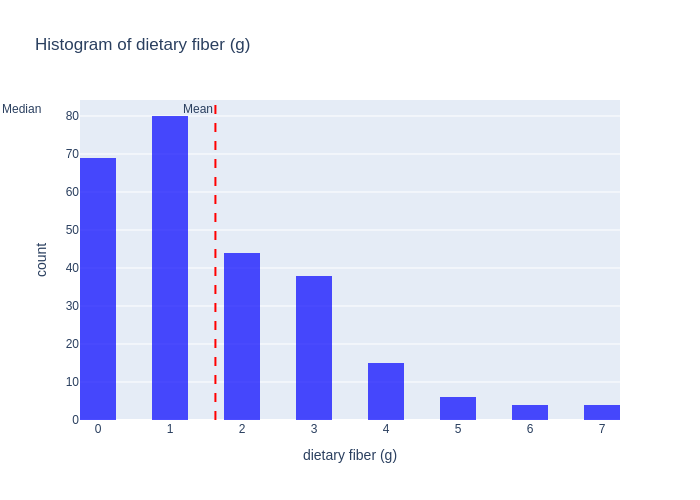

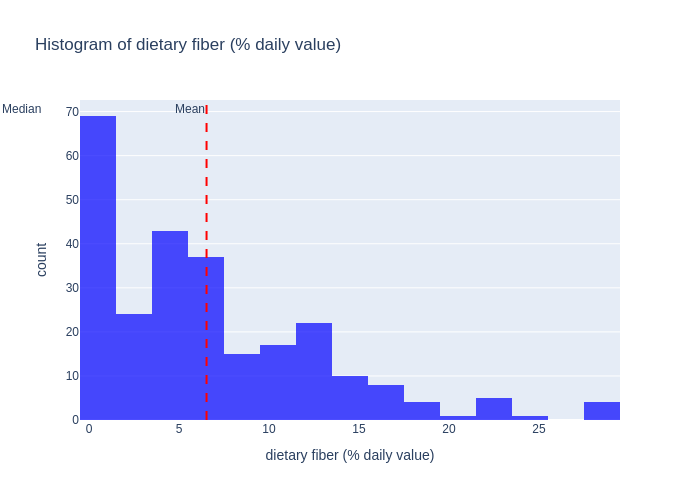

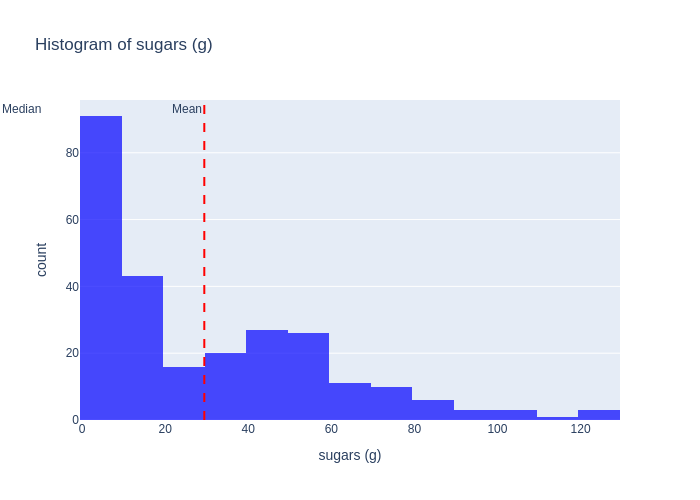

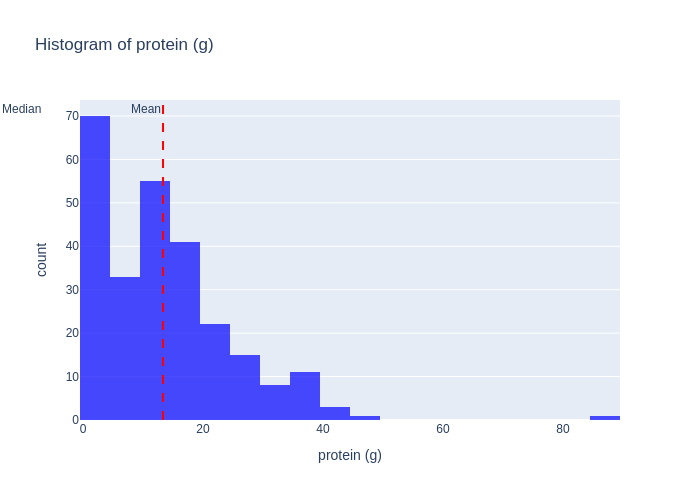

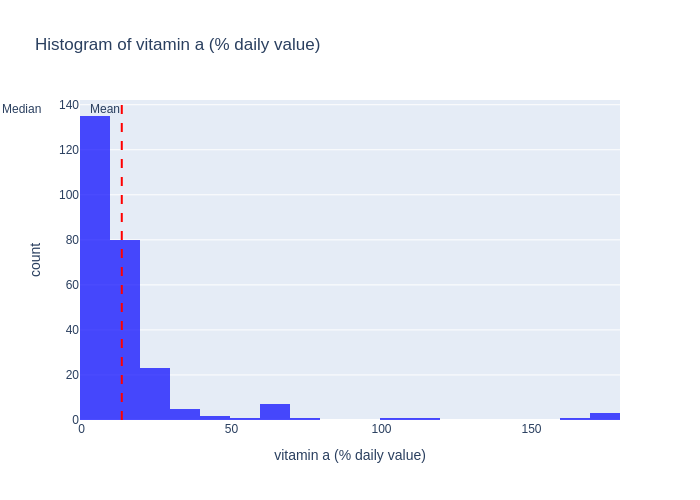

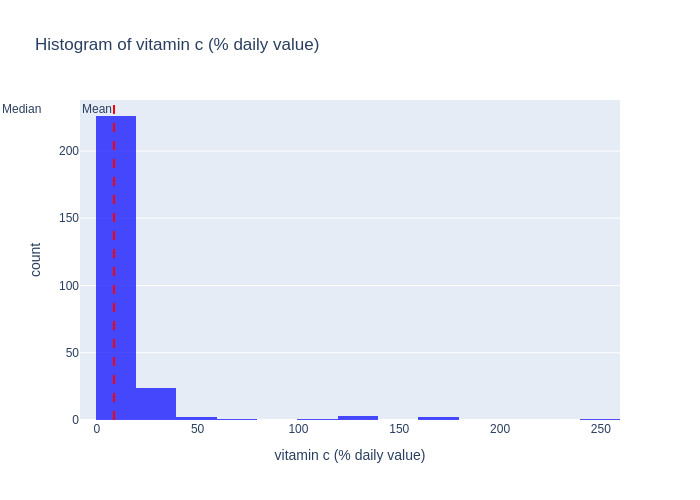

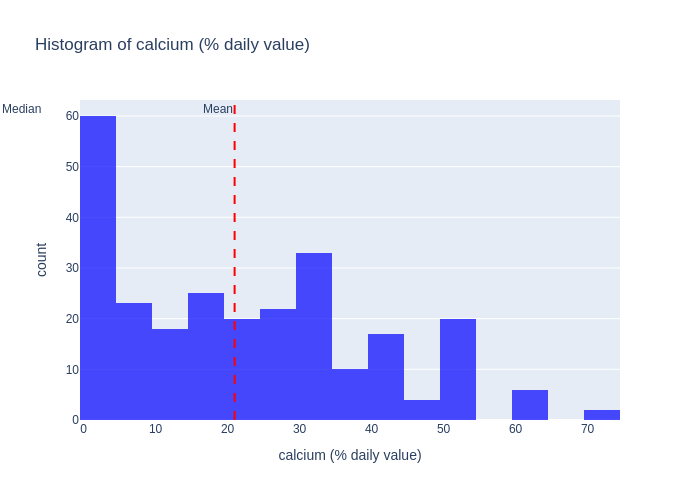

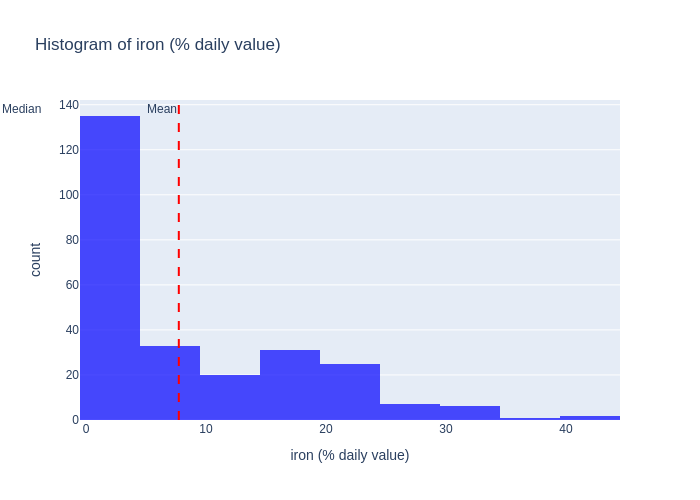

In [10]:
import pandas as pd
import numpy as np
import plotly.express as px

# Load the nutrition dataset
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
nutrition_df = pd.read_csv(url)

# Inspect the data types
print(nutrition_df.dtypes)

# Convert all object columns to numeric, coercing errors
for col in nutrition_df.columns:
    nutrition_df[col] = pd.to_numeric(nutrition_df[col], errors='coerce')

# Check for NaN values after conversion
# print(nutrition_df.isnull().sum())

# Drop all rows with any NaN values
nutrition_df = nutrition_df.dropna(how='any')

# Optionally, drop columns with all NaN values
nutrition_df = nutrition_df.dropna(axis=1, how='all')

# Select numerical columns for analysis
numerical_cols = nutrition_df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)

# Generate histograms for all numerical columns
for col in numerical_cols:
    # Create a histogram for the current numerical column
    fig = px.histogram(nutrition_df, x=col, title=f'Histogram of {col}', 
                       nbins=20, opacity=0.7, color_discrete_sequence=['blue'])
    
    # Calculate mean and median of the current column
    mean_value = nutrition_df[col].mean()
    median_value = np.quantile(nutrition_df[col], [0.5])
    
    # Add lines for mean and median
    fig.add_vline(mean_value, line_color='red', line_dash='dash', 
                   annotation_text='Mean', annotation_position='top left')
    fig.add_vline(median_value, line_color='green', line_dash='dash', 
                   annotation_text='Median', annotation_position='top left')
    
    # Show the histogram with the mean and median lines
    fig.show(renderer="png")


In [11]:
# Question 6:
# The nutrition dataset shows a wide range of variations in caloric content,
# fat, and sodium levels among different food items

# Interestingly, most variables, including calories, total fat, and sodium, 
# display a right-hand skew. This means that a small number of items have 
# very high values, which can pull the average up significantly

# Understanding this skew is crucial, as it emphasizes the need for 
# accurate data when analyzing food options

# Good data helps consumers make informed choices, 
# guides nutritionists in crafting better dietary recommendations, 
# and aids food manufacturers in developing healthier products

In [12]:
import plotly.express as px

# Load the Gapminder dataset
df = px.data.gapminder()

# Create a styled scatter plot with animation
fig = px.scatter(df, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 animation_frame="year", 
                 animation_group="country",
                 size="pop", 
                 color="continent", 
                 hover_name="country",
                 log_x=True, 
                 size_max=55, 
                 range_x=[100, 100000], 
                 range_y=[25, 90],
                 title="Life Expectancy vs GDP Per Capita Over Time",
                 labels={"gdpPercap": "GDP Per Capita", "lifeExp": "Life Expectancy"},
                 color_continuous_scale=px.colors.sequential.Plasma)  # Change the color scale

# Customize marker styles
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey'),
                               opacity=0.7))  # Add border to markers and set opacity

# Update layout styles
fig.update_layout(
    title=dict(text="Life Expectancy vs GDP Per Capita Over Time", font=dict(size=24)),
    xaxis_title="GDP Per Capita",
    yaxis_title="Life Expectancy",
    xaxis=dict(showgrid=True, zeroline=True, showline=True),
    yaxis=dict(showgrid=True, zeroline=True, showline=True),
    legend_title_text='Continent',
    hoverlabel=dict(bgcolor='white', font_size=12, font_family="Rockwell")  # Customize hover label
)

# Show the figure
fig.show()


In [13]:
import plotly.express as px

# Load the Gapminder dataset
df = px.data.gapminder()

# Adjust the DataFrame to include the necessary columns and calculate percent change
# Assuming we want to calculate the percent change of life expectancy for demonstration purposes
# We will create a new DataFrame with the required values

# For this example, let's create a mock dataset to mimic your requirements
import numpy as np

# Create a new DataFrame for demonstration
data = {
    'name': df['country'],
    'year': df['year'],
    'percent_change': np.random.uniform(-0.005, 0.005, size=len(df)),  # Random percent changes
    'rank': np.random.randint(1, 200, size=len(df)),  # Random ranks
    'percent': np.random.uniform(0, 100, size=len(df)),  # Random percentages
    'sex': np.random.choice(['Male', 'Female'], size=len(df))  # Random sex categories
}

# Create the new DataFrame
new_df = pd.DataFrame(data)

# Create a styled scatter plot with the new parameters
fig = px.scatter(new_df, 
                 x="percent_change", 
                 y="rank", 
                 animation_frame="year", 
                 animation_group="name", 
                 size="percent", 
                 color="sex", 
                 hover_name="name",
                 size_max=50, 
                 range_x=[-0.005, 0.005], 
                 title="Rank vs Percent Change Over Time by Sex")

# Customize marker styles
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey'), 
                               opacity=0.7))  # Add border to markers and set opacity

# Update layout styles
fig.update_layout(
    title=dict(text="Rank vs Percent Change Over Time by Sex", font=dict(size=24)),
    xaxis_title="Percent Change",
    yaxis_title="Rank",
    xaxis=dict(showgrid=True, zeroline=True, showline=True),
    legend_title_text='Sex',
    hoverlabel=dict(bgcolor='white', font_size=12, font_family="Rockwell")  # Customize hover label
)

# Show the figure
fig.show()
